In [43]:
import numpy as np
import matplotlib.pyplot as plt

## Q1
### i) using sample mean: the sample mean is not affected by the initial q values, so it is not affected by the initial policy.

In [44]:
# i)
q = [0,5,8,-6, 0] # 1st element is not used, its a dummy bcz arms index starts from 1(index shows arms)
count = [0,0,0,0,0]
actions = [2,3,4,4,1,2,3,3,1]
rewards = [-5,9,5,2,-4,9,10,2,1]
for i in range(len(actions)):
    q[actions[i]] = (q[actions[i]]*count[actions[i]] + rewards[i])/(count[actions[i]]+1)
    count[actions[i]] += 1
print(q[1:])

[-1.5, 2.0, 7.0, 3.5]


In [45]:
# ii) using exponentially weighted average with alpha = 0.1
alpha = 0.1
q = [0,5,8,-6, 0] 
actions = [2,3,4,4,1,2,3,3,1]
rewards = [-5,9,5,2,-4,9,10,2,1]
for i in range(len(actions)):
    q[actions[i]] = q[actions[i]] + alpha*(rewards[i] - q[actions[i]])
print(q[1:])

[3.7899999999999996, 6.93, -2.545, 0.65]


ii) using the equation Q(n, a) = Q(n-1, a) + alpha * (R(n) - Q(n-1, a)), we can see that the q values are not affected by the initial policy if alpha is 1/n, where n is the number of times the action is taken.(for sample mean case, initially n is 1, so the initial q values get cancelled out)
for alpha = 0.1, the q values are affected by the initial policy, because the initial q values are not getting cancelled out.

#### Q2: a class for Bandit

In [170]:
# Q2
class Bandit:
    def __init__(self, num_of_arms, epsilon, total_steps, means, variances, dynamic_epsilon = False):
        self.arm_num = np.size(num_of_arms)
        self.epsilon = epsilon
        self.current_step = 0
        self.num_of_times_specific_arm_selected = np.zeros(num_of_arms)
        self.total_steps = total_steps
        self.arm_mean_rewards = np.zeros(num_of_arms)  # Initialize mean rewards of arms
        self.curr_reward = np.zeros(total_steps + 1)  # reward at each step
        self.mean_reward = np.zeros(total_steps + 1)  # mean reward at each step
        self.means = means
        self.variances = variances
        self.dynamic_epsilon = dynamic_epsilon
        self.optimal_arm = np.argmax(self.means)    
        self.optimal_count = 0
        self.optimal_count_list = np.zeros(total_steps + 1)

    def select_arm(self):
        prob_of_selecting_specific_arm = np.random.rand()
        if prob_of_selecting_specific_arm <= self.epsilon :  # explore
            selected_arm = np.random.randint(self.arm_num)
        else:  # exploit (greedy)
            selected_arm = np.argmax(self.arm_mean_rewards)
        if (selected_arm == self.optimal_arm):
            self.optimal_count += 1
        self.optimal_count_list[self.current_step] = self.optimal_count/(self.current_step+1)
        if (self.dynamic_epsilon):
            self.epsilon = self.epsilon - 0.001
        self.current_step += 1
        self.num_of_times_specific_arm_selected[selected_arm] += 1
        self.curr_reward[self.current_step] = np.random.normal(self.means[selected_arm], self.variances[selected_arm])
        # self.mean_reward[self.current_step] = self.mean_reward[self.current_step - 1] + (1 / self.current_step) * (
        #         self.curr_reward[self.current_step - 1] - self.mean_reward[self.current_step - 1])
        self.arm_mean_rewards[selected_arm] += (1 / self.num_of_times_specific_arm_selected[selected_arm]) * (
                self.curr_reward[self.current_step] - self.arm_mean_rewards[selected_arm])

    def run_for_curr_reward(self):
        for i in range(self.total_steps):
            self.select_arm()
        return self.curr_reward
    
    def run_for_mean_reward(self):
        for i in range(self.total_steps):
            self.select_arm()
        return self.mean_reward

#### Q2: plotting the current reward for 1000 steps in 1 episode, for 4 different values of epsilon 

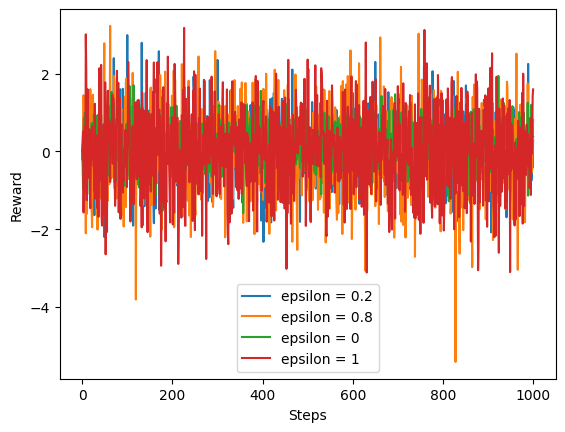

In [256]:
means = [0, 0, 0, 0.2]
variances = [1, 0.7, 0.2, 0.5]
num_of_arms = 4
total_steps = 1000
bandit1 = Bandit(num_of_arms, 0.2, total_steps, means, variances)
curr_reward1 = bandit1.run_for_curr_reward()
bandit2 = Bandit(num_of_arms, 0.8, total_steps, means, variances)
curr_reward2 = bandit2.run_for_curr_reward()
bandit3 = Bandit(num_of_arms, 0, total_steps, means, variances)
curr_reward3 = bandit3.run_for_curr_reward()
bandit4 = Bandit(num_of_arms, 1, total_steps, means, variances)
curr_reward4 = bandit4.run_for_curr_reward()
plt.plot(curr_reward1, label='epsilon = 0.2')
plt.plot(curr_reward2, label='epsilon = 0.8')
plt.plot(curr_reward3, label='epsilon = 0')
plt.plot(curr_reward4, label='epsilon = 1')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.show()


#### epsilon as a function of time, epsilon is decreasing by 0.01 after every time step

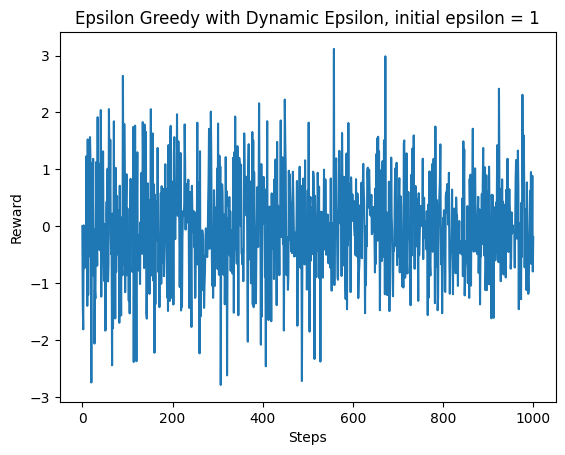

In [155]:
# plot a graph for epsilon 
bandit = Bandit(num_of_arms, 1, total_steps, means, variances, dynamic_epsilon = True)
curr_reward = bandit.run_for_curr_reward()
plt.plot(curr_reward, label='epsilon = 1')
plt.xlabel('Steps')
plt.ylabel('Reward')
# plt.legend()
plt.title('Epsilon Greedy with Dynamic Epsilon, initial epsilon = 1')
plt.show()

#### Q3: 10 arm testbed with variance = 1. Plot the average reward for each step in the episode, 1000 steps and 2000 episodes. 

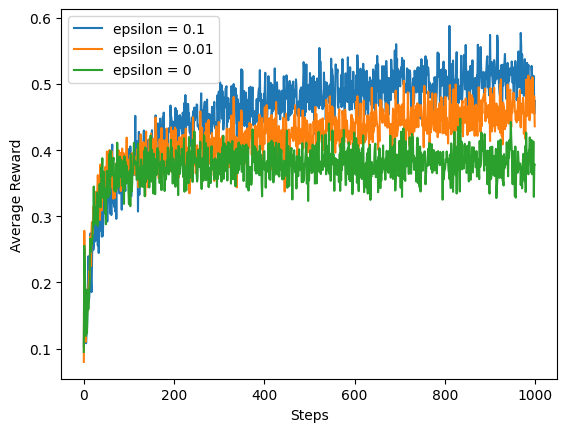

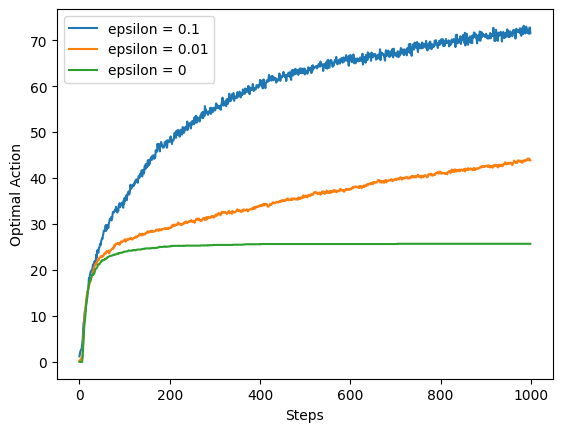

In [223]:
means = np.random.normal(0, 1, 10)
variances = np.ones(10)
total_steps = 1000
episodes = 2000
arms = 10
epsilon = [0.1,0.01,0]
def reward_list(epsilon):
    mean_reward = np.zeros(total_steps)
    optimal_count_list = np.zeros(total_steps)
    # for 1000 steps
    for k in range(episodes):
        curr_reward = np.zeros(total_steps)
        times_arm_selected = np.zeros(arms)
        q_values = np.zeros(arms)
        
        optimal_count = 0
        for i in range(total_steps):


            if np.random.rand()< epsilon:
                selected_arm = np.random.randint(arms) # explore
            else:
                selected_arm = np.argmax(q_values) # greedy
            times_arm_selected[selected_arm] += 1
            curr_reward[i] = np.random.normal(means[selected_arm], variances[selected_arm])
            q_values[selected_arm] +=  (1/times_arm_selected[selected_arm])*(curr_reward[i] - q_values[selected_arm])
            optimal_count_list[i] += (selected_arm == np.argmax(means))
        mean_reward += curr_reward/episodes
    optimal_count_list /= episodes
    optimal_count_list *= 100
    return mean_reward, optimal_count_list
mean_reward_01, optimal_count_list_01 = reward_list(0.1)
mean_reward_001, optimal_count_list_001 = reward_list(0.01)
mean_reward_0, optimal_count_list_0 = reward_list(0)
# print(optimal_count_list_0)
plt.plot(mean_reward_01, label='epsilon = 0.1')
plt.plot(mean_reward_001, label='epsilon = 0.01')
plt.plot(mean_reward_0, label='epsilon = 0')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.show()
plt.plot(optimal_count_list_01, label='epsilon = 0.1')
plt.plot(optimal_count_list_001, label='epsilon = 0.01')
plt.plot(optimal_count_list_0, label='epsilon = 0')
plt.xlabel('Steps')
plt.ylabel('Optimal Action')
plt.legend()
plt.show()

#### Q4: 10 arm testbed with variance = 4. Plot the average reward for each step in the episode, 1000 steps and 2000 episodes. 

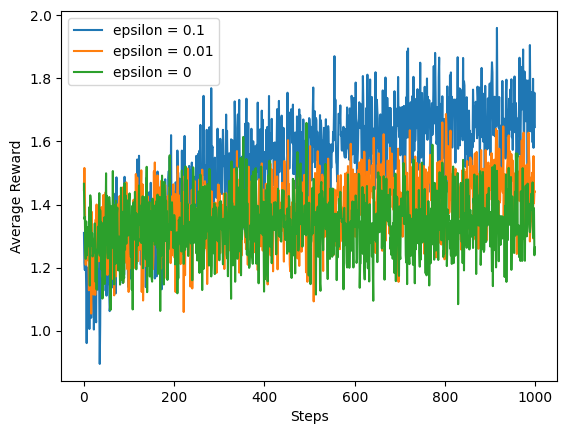

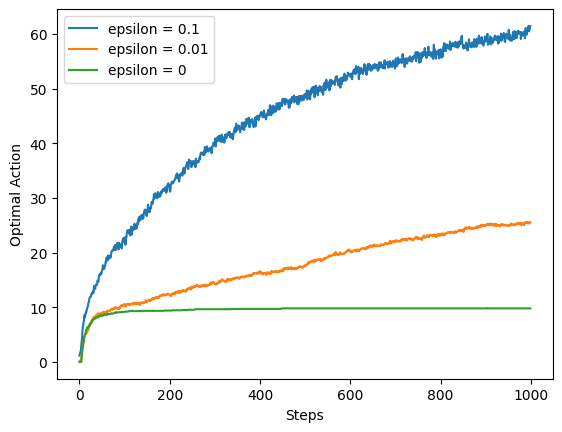

In [225]:
means = np.random.normal(0, 1, 10)
variances = np.ones(10)*4
total_steps = 1000
episodes = 2000
arms = 10
epsilon = [0.1,0.01,0]
def reward_list(epsilon, episodes = 2000, steps = 1000):
    # print(means)
    
    # print(times_arm_selected)
    
    mean_reward = np.zeros(total_steps)
    optimal_count_list = np.zeros(total_steps)
    # for 1000 steps
    for k in range(episodes):
        curr_reward = np.zeros(total_steps)
        times_arm_selected = np.zeros(arms)
        q_values = np.zeros(arms)
        
        optimal_count = 0
        for i in range(total_steps):


            if np.random.rand()< epsilon:
                selected_arm = np.random.randint(arms) # explore
            else:
                selected_arm = np.argmax(q_values) # greedy
            times_arm_selected[selected_arm] += 1
            # if selected_arm == np.argmax(means):
            #     optimal_count += 1
            curr_reward[i] = np.random.normal(means[selected_arm], variances[selected_arm])
            q_values[selected_arm] +=  (1/times_arm_selected[selected_arm])*(curr_reward[i] - q_values[selected_arm])
            optimal_count_list[i] += (selected_arm == np.argmax(means))
        mean_reward += curr_reward/episodes
    optimal_count_list /= episodes
    optimal_count_list *= 100
    return mean_reward, optimal_count_list
mean_reward_01, optimal_count_list_01 = reward_list(0.1)
mean_reward_001, optimal_count_list_001 = reward_list(0.01)
mean_reward_0, optimal_count_list_0 = reward_list(0)
# print(optimal_count_list_0)
plt.plot(mean_reward_01, label='epsilon = 0.1')
plt.plot(mean_reward_001, label='epsilon = 0.01')
plt.plot(mean_reward_0, label='epsilon = 0')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.show()
plt.plot(optimal_count_list_01, label='epsilon = 0.1')
plt.plot(optimal_count_list_001, label='epsilon = 0.01')
plt.plot(optimal_count_list_0, label='epsilon = 0')
plt.xlabel('Steps')
plt.ylabel('Optimal Action')
plt.legend()
plt.show()

#### Q5: Use UCB to solve the 10 arm testbed with variance = 1. Plot the average reward for each step in 1 episode

Ex: 2.8: When we start ucb, all actions are considered maximising actions, that is all of them have an equal probability of being picked up. 10 steps are required to perform each action exactly once. At the 11th step, the algorithm's exploration has provided enough information to get a relatively confident estimate of the arm with the highest potential reward. The algorithm chooses this arm and receives a higher reward, leading to the spike in performance.
After the 11th step, the algorithm starts exploiting the arm with the highest potential reward, which might be bad if there is another arm with a higher potential reward. This decrease in exploration and exploiting only a single arm can lead to decrease in overall average reward.

C:\Users\richa\AppData\Local\Temp\ipykernel_16568\3294268117.py:15: RuntimeWarning: invalid value encountered in divide
  ucb = q_values + c*np.sqrt(np.log(i+1)/times_arm_selected)
C:\Users\richa\AppData\Local\Temp\ipykernel_16568\3294268117.py:15: RuntimeWarning: divide by zero encountered in divide
  ucb = q_values + c*np.sqrt(np.log(i+1)/times_arm_selected)


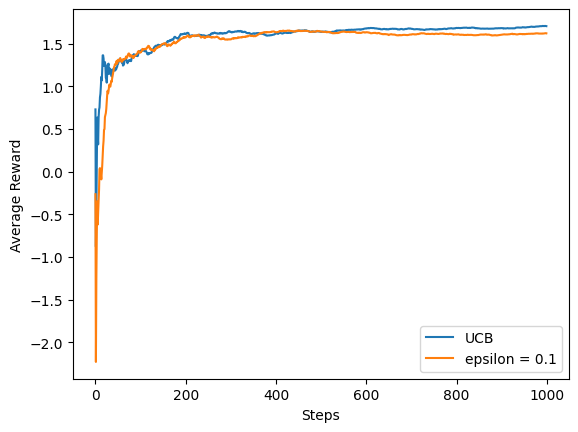

In [245]:
# plot average reward vs step for 1 episodes, 1000 steps, 10 arms, epsilon = 0.1 using UCB
means = np.random.normal(0, 1, 10)
variances = np.ones(10)
total_steps = 1000
episodes = 1
arms = 10
curr_reward = np.zeros(total_steps)
times_arm_selected = np.zeros(arms)
q_values = np.zeros(arms)
avg_reward = np.zeros(total_steps)
epsilon = 0.1
c = 2
# ucb
for i in range(total_steps):
    ucb = q_values + c*np.sqrt(np.log(i+1)/times_arm_selected)
    # print(ucb)
    selected_arm = np.argmax(ucb)
    times_arm_selected[selected_arm] += 1
    curr_reward[i] = np.random.normal(means[selected_arm], variances[selected_arm])
    q_values[selected_arm] +=  (1/times_arm_selected[selected_arm])*(curr_reward[i] - q_values[selected_arm])
    avg_reward[i] = np.mean(curr_reward[:i+1])
plt.plot(avg_reward, label='UCB')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
mean_reward_01,_ = reward_list(0.1, episodes = 1, steps = 1000)
avg_reward = np.zeros(total_steps)
for i in range(total_steps):
    avg_reward[i] = np.mean(mean_reward_01[:i+1])
plt.plot(avg_reward, label='epsilon = 0.1')
plt.legend()
plt.show()

#### Q6: use H(t)(Gradient Bandit Algorithm), averaged over 2000 episodes, each episode having 1000 steps, to solve the 10 arm testbed with variance = 1. Plot the optimal action for each step in 1 episode

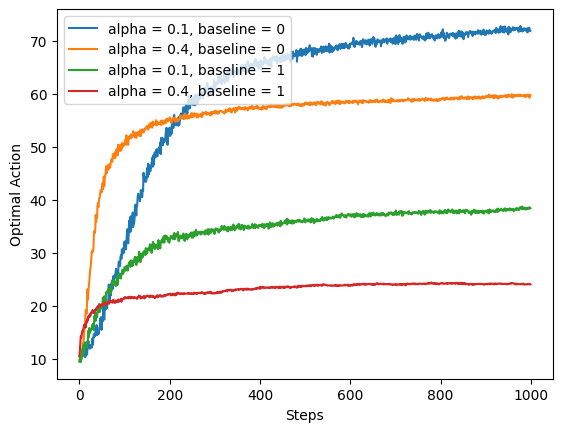

In [254]:
h = np.zeros(10)
means = np.random.normal(4, 1, 10)
variances = np.ones(10)
total_steps = 1000
episodes = 1
arms = 10
def grad_band(alpha, baseline, episodes = 2000, total_steps = 1000):
    optimal_count_list = np.zeros(total_steps)
    for k in range(episodes):
        curr_reward = np.zeros(total_steps)
        optimal_count = 0
        avg_reward = 0
        h = np.zeros(10)
        for i in range(total_steps):
            prob = np.exp(h)/np.sum(np.exp(h))
            selected_arm = np.random.choice(arms, p = prob)
            if selected_arm == np.argmax(means):
                optimal_count += 1
            curr_reward[i] = np.random.normal(means[selected_arm], variances[selected_arm])
            if baseline == 0:
                avg_reward = avg_reward + (1/(i+1))*(curr_reward[i] - avg_reward)

            for j in range(arms):
                if j == selected_arm:
                    h[j] += alpha*(curr_reward[i] - avg_reward)*(1 - prob[j])
                else:
                    h[j] -= alpha*(curr_reward[i] - avg_reward)*prob[j]

            optimal_count_list[i] += (selected_arm == np.argmax(means))
    optimal_count_list /= episodes
    optimal_count_list *= 100
    return optimal_count_list

optimal_count_list = grad_band(0.1, 0)
plt.plot(optimal_count_list, label='alpha = 0.1, baseline = 0')
optimal_count_list = grad_band(0.4, 0)
plt.plot(optimal_count_list, label='alpha = 0.4, baseline = 0')
optimal_count_list = grad_band(0.1, 1)
plt.plot(optimal_count_list, label='alpha = 0.1, baseline = 1')
optimal_count_list = grad_band(0.4, 1)
plt.plot(optimal_count_list, label='alpha = 0.4, baseline = 1')
plt.xlabel('Steps')
plt.ylabel('Optimal Action')
plt.legend()
plt.show()


